# (Ford GoBike System Data)
## by (Abdulaziz Omar Bin Dayil)

## Preliminary Wrangling

> The Ford GoBike System Data is a dataset about the bikes and information about who took this bike, and the stations that where was the bike and where he dropped it, etc.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [3]:
#Loading the dataset 
df=pd.read_csv("201902-fordgobike-tripdata.csv")
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
df.sample(5)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
131471,447,2019-02-09 12:29:15.3910,2019-02-09 12:36:43.0060,200.0,2nd Ave at E 18th St,37.800214,-122.253810,202.0,Washington St at 8th St,37.800754,-122.274894,5236,Subscriber,1977.0,Male,No
108051,335,2019-02-13 10:22:35.6830,2019-02-13 10:28:11.4380,16.0,Steuart St at Market St,37.794130,-122.394430,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,4924,Subscriber,1975.0,Male,No
46425,224,2019-02-22 09:52:09.6470,2019-02-22 09:55:53.7940,204.0,55th St at Telegraph Ave,37.840186,-122.261822,188.0,Dover St at 57th St,37.842630,-122.267738,405,Subscriber,1962.0,Other,No
165470,365,2019-02-05 06:57:04.4360,2019-02-05 07:03:09.9370,210.0,45th St at Manila,37.833294,-122.256224,171.0,Rockridge BART Station,37.844279,-122.251900,5119,Subscriber,1957.0,Male,No
11581,195,2019-02-27 18:32:04.2950,2019-02-27 18:35:20.2140,130.0,22nd St Caltrain Station,37.757288,-122.392051,126.0,Esprit Park,37.761634,-122.390648,2665,Subscriber,1989.0,Male,No


### see the null value and drop it  

In [7]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

### making sure there is no duplicate

In [10]:
df.duplicated().sum()

0

### edit the data type 

In [11]:
df['start_time'] = df['start_time'].astype('datetime64[ns]')
df['end_time'] = df['end_time'].astype('datetime64[ns]')

In [12]:
df['user_type'] = df['user_type'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

### What is the structure of your dataset?

> There are 183411 bikes in this dataset with 16 features.
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Member Year of Birth
- Member Gender
- bike_share_for_all_trip
 
### What is/are the main feature(s) of interest in your dataset?

> I think the  "User_type", "member_birth_year" and "member_gender"


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- 1-User_type
- 2-member_birth_year
- 3-member_gender
- 4-duration_sec

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### what is Average of the riders

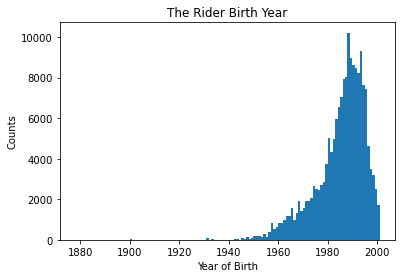

In [14]:
bin_edges = np.arange(df['member_birth_year'].min(), df['member_birth_year'].max() + 1, 1)
plt.hist(data = df, x ='member_birth_year',bins = bin_edges);
plt.title('The Rider Birth Year');
plt.xlabel('Year of Birth');
plt.ylabel('Counts');

#### Like we see most of the riders are between 40 and 25 years old

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### middle of finishing riders the race 

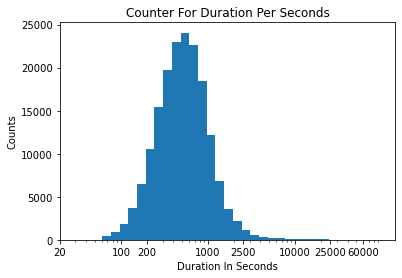

In [15]:
bin_edegs = 10 ** np.arange(1.785, 4.936+0.1, 0.1)
ticks = [20,100,200,1000,2500,10000,25000, 60000]
labels = ['{}' .format(v) for v in ticks]
plt.hist(data = df, x = 'duration_sec' , bins = bin_edegs);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.title('Counter For Duration Per Seconds');
plt.xlabel('Duration In Seconds');
plt.ylabel('Counts');

#### Most riders finish the race between 200 and 1000 Seconds

### what is the most riders gender 

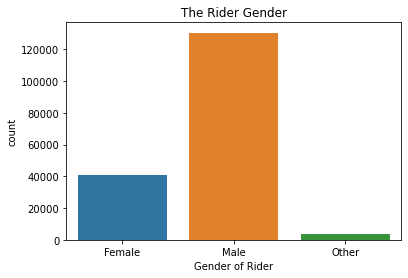

In [16]:
base_color = sb.color_palette()[2]
sb.countplot(data = df, x = 'member_gender');
plt.title('The Rider Gender');
plt.xlabel('Gender of Rider');

#### Like we se most of the riders are men and we can say that this sport is more popular for men

### how is more the subscribers or customer

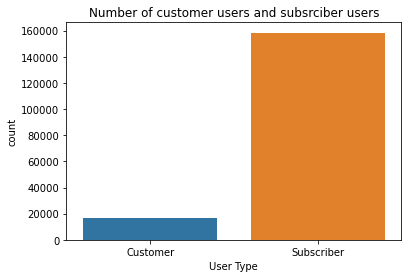

In [17]:
sb.countplot(data = df, x = 'user_type');
plt.xlabel('User Type');
plt.title('Number of customer users and subsrciber users');

#### like we see the the number of subscribers is more than the customer 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> No i think all are good

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes in the duration_sec i had to add ticks and bin edges to make the distribution better


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### how is more faster customer or Subscribers

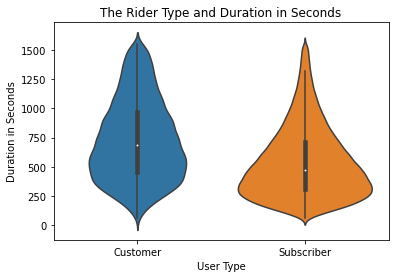

In [18]:
sb.violinplot(data = df.query('duration_sec <= 838 + 1.5*474'),
              x = 'user_type',y='duration_sec');
plt.title('The Rider Type and Duration in Seconds');
plt.xlabel('User Type');
plt.ylabel('Duration in Seconds');

#### The Coustomers takes more time than the Subscribers

### what's more gender  rider by years?

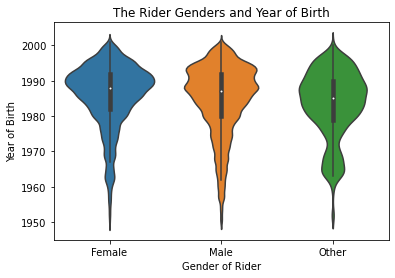

In [19]:
# here i have user the "df.query("member_birth_year >= 1950 ")" to Determination of the y axis 
sb.violinplot(data = df.query("member_birth_year >= 1950 ")
              ,x = 'member_gender',y='member_birth_year',);
plt.title('The Rider Genders and Year of Birth');
plt.xlabel('Gender of Rider');
plt.ylabel('Year of Birth');

#### in 1990 the the female is the most 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> i creat two for the first we want to so how is faster the customers or the subscribers and like we see the subscribers are take less time and for the second between the genders and year of birth and like we se the female are more in 1990 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, the female is the most riders in 1990

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [20]:
## convert seconds to minutes
df['duration_min'] = df['duration_sec'] // 60
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,29


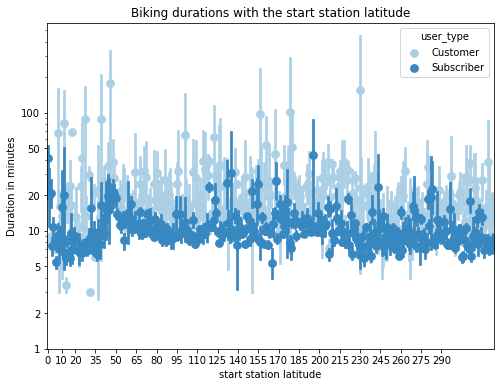

In [21]:
fig = plt.figure(figsize = [8,6]);
ax = sb.pointplot(data = df, x = 'start_station_latitude', y = 'duration_min', hue = 'user_type',
           palette = 'Blues', linestyles = '');
plt.title('Biking durations with the start station latitude')
plt.xlabel('start station latitude')
plt.ylabel('Duration in minutes')
plt.yscale('log')
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
plt.xticks([0,10,20,35,50,65,80,95,110,125,140,155,170,185,200,215,230,245,260,275,290],[0,10,20,35,50,65,80,95,110,125,140,155,170,185,200,215,230,245,260,275,290]);
ax.set_yticklabels([],minor = True);

#### Most of the Subscribers finished the race faster than the Customers, and the most frequent latitude for the Subscribers is 230, and for the the Customers is 200

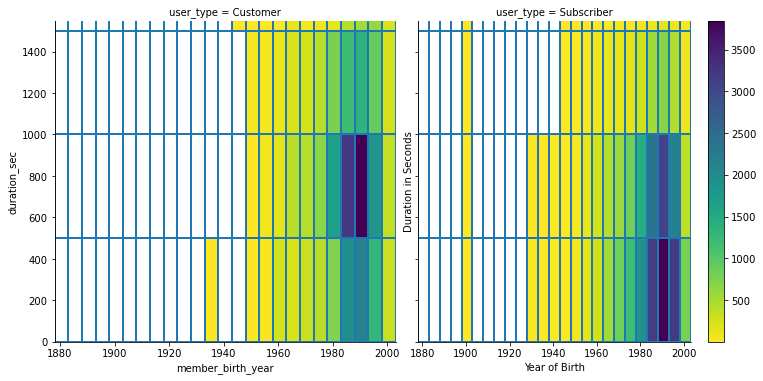

In [22]:
x_bin = np.arange( df['member_birth_year'].min(), df['member_birth_year'].max()+5, 5)
y_bin = np.arange(0, (838 + 1.5*474)+500, 500)
_temp = df.sample(35000, random_state=42)
m = sb.FacetGrid(data = _temp, col = 'user_type',height=5.4)
m.map(plt.hist2d, 'member_birth_year','duration_sec',cmin=0.5,cmap = 'viridis_r',bins=[x_bin, y_bin]);
plt.ylim((0,(838 + 1.5*474)));
plt.colorbar();
plt.xlabel('Year of Birth');
plt.ylabel('Duration in Seconds');


- Customer usually takes from 500 to 1000 Seconds in thier Rides
- Subscriber usually takes from 0 to 500 Seconds in thier Rides
- and they are all between 1980 and 1995 Years old

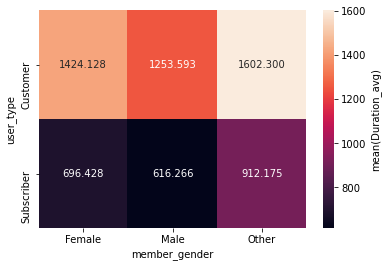

In [23]:
cat_means = df.groupby(['member_gender', 'user_type']).mean()['duration_sec']
cat_means = cat_means.reset_index(name = 'Duration_avg')
cat_means = cat_means.pivot(index = 'user_type', columns = 'member_gender',
                            values = 'Duration_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(Duration_avg)'});

- as you can see the coustomer "other" are the highest in the average Duration ( top Right )
- where the male Subscriber are the lowest in the average Duration ( bottom middle )

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> You Can see that most of the riders are in between 1980 and 1995

### Were there any interesting or surprising interactions between features?

> i am not sure but i think the duration and the other gender have some interaction.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!